<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Logistic Regression Project</h1>
</div>

<img src="attachment:86546f93-aa15-44a3-bdb2-4e34340ee9d3.png" width="300" style="margin: 0 auto;">


For this project, we'll be working on the titanic dataset.

**Research Goal: We'd like to classify passengers of the titanic dataset so we could see if there is a way to predict who would have survived.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Part 1

Read the dataset (located at `../datasets/titanic.csv`) and do some exploratory analysis and data cleansing.

### Things to consider when data cleansing:
* What is some initial info we can obtain about the dataset?
* How many missing entries are in our dataset?
* What rows/columns do not contain enough information to be useful? 
  - A lot of information 
* For columns with nominal data, how many different categories are there? (hint: `df['column'].nunique`)
* For rows missing data, is there a way we can fill in that information using our dataset? 
  - For columns like age: consider plotting the histogram (easy way is `df['age'].hist()`) and checking if the data is normally distributed. If not, consider using `median` age as a replacement for missing data. You can go even further and group by `Pclass` and `Sex` in order to use more specific age values for median.
  - For passengers missing "embarked" data, try checking [this website](https://www.encyclopedia-titanica.org/titanic-survivor/) for the missing data.
  - For cabin, replace missing values with 'M'. You can take this further since upper cabins ('A', 'B', 'C') had a better chance at survival but we'll leave that as an optional task. 

### Things to consider when doing exploratory analysis.
* What is the shape of the dataset?
* What are the mean and median values for different columns? (hint: consider using boxplots to visualize this sort of information)
* What is the distribution of the data? (hint: consider using histograms to visualize this sort of information)
* What are the total numbers for different categories for columns? E.g.  For survived, what are the total numbers of passengers who survived vs who didn't survive? (hint: consider using bar charts to visualize this sort of information).

Column information is as follows:
<table>
  <tr>
    <th>variable</th>
    <th>definition</th>
    <th>key</th>
  </tr>
  <tr>
    <td>PassengerID</td>
    <td>ID given to passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>indicator if passenger survived</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket Class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>sex of passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Age</td>
    <td>age of passenger in years</td>
    <td></td>
  </tr>
  <tr>
    <td>Sibsp</td>
    <td># of passenger's siblings/spouses aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Parch</td>
    <td># of passenger's parents/children aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>ticket number</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>fare paid by passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>cabin number</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>port of embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>

In [2]:
df = pd.read_csv('../datasets/titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# What is some initial info we can obtain about the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# How many missing entries are in our dataset?
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# What rows/columns do not contain enough information to be useful?
# A lot of information
df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
# For columns with nominal data, how many different categories are there? (hint: df['column'].nunique)
# df.groupby('Sex').nunique(dropna=True)
df.groupby('Sex').nunique()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,2,3,314,63,7,7,247,156,75,3
male,577,2,3,577,82,7,6,519,193,96,3


In [8]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
lst = ['Cabin', 'Embarked', 'Sex', 'Pclass', 'Survived']
for l in lst:
    x = df[l].unique()
    print(l, ':', x)

Cabin : [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Embarked : ['S' 'C' 'Q' nan]
Sex : 

In [11]:
# For rows missing data, is there a way we can fill in that information using our dataset?
# df.fillna(0)

<AxesSubplot:>

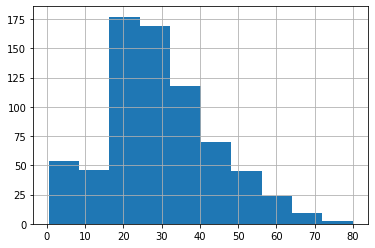

In [12]:
# For columns like age: consider plotting the histogram (easy way is df['age'].hist()) and checking if the data is normally distributed. If not, consider using median age as a replacement for missing data. You can go even further and group by Pclass and Sex in order to use more specific age values for median.
df['Age'].hist()

In [13]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [14]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [15]:
df['Age'] = df.groupby(['Pclass', 'Sex'], sort=False)['Age'].apply(lambda row: row.fillna(round(row.median())))
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

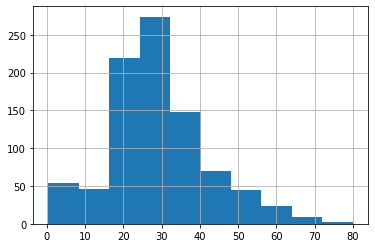

In [16]:
df['Age'].hist()

<AxesSubplot:ylabel='Density'>

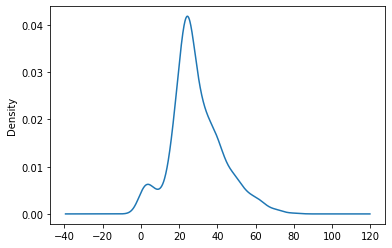

In [17]:
df['Age'].plot.kde()

In [18]:
# For passengers missing "embarked" data, try checking this website for the missing data.
# df[df['Embarked'] == '0']
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
# For cabin, replace missing values with 'M'. 
df['Cabin'] = df['Cabin'].fillna('M')
df['Cabin']

0         M
1       C85
2         M
3      C123
4         M
       ... 
886       M
887     B42
888       M
889    C148
890       M
Name: Cabin, Length: 891, dtype: object

In [20]:
# You can take this further since upper cabins ('A', 'B', 'C') had a better chance at survival but we'll leave that as an optional task.
df['Cabin Letter'] = df['Cabin'].str[0]
df['Cabin Letter']

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin Letter, Length: 891, dtype: object

In [21]:
df["Cabin Survival"] = df["Cabin Letter"].apply(lambda x: 1 if x=='A' or x=='B' or x=='C' else 0)
df["Cabin Survival"]

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin Survival, Length: 891, dtype: int64

# Part 2

### Prepare our data for our logistic regression.
* Do one-hot encodings for our nominal data. One-Hot Encoding is a fancy way of turning nominal data (data that is categorical) into numerical data that we can use.
  - We did this with the heightsandweights dataset when we turned converted values for `Sex` into `0`s and `1`s. We must do it again for the `Sex` column in this dataset. 
  - For `Pclass`, make a one-hot-encoding for each passenger class (meaning created a column for 1st class and the values for that column should be 1 if the passenger was in 1st class or 0 otherwise). Do this for each possible value of `Pclass`.
* Remove columns that contain non-numerical data that we cannot use for our logistic regression.
* Make some initial charts to try to find relationships in our data to see if our logistic regression could work (doesn't always show 

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Letter,Cabin Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,22.0,1,2,W./C. 6607,23.4500,M,S,M,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1


In [23]:
# Do one-hot encodings for our nominal data. One-Hot Encoding is a fancy way of turning nominal data (data that is categorical) into numerical data that we can use.
df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "female" else 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Letter,Cabin Survival
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,M,S,M,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,M,S,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,M,S,M,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,M,S,M,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,C,1


In [24]:
# For Pclass, make a one-hot-encoding for each passenger class (meaning created a column for 1st class and the values for that column should be 1 if the passenger was in 1st class or 0 otherwise). Do this for each possible value of Pclass.
df["1st_class"] = df["Pclass"].apply(lambda x: 1 if x==1 else 0)
df["2nd_class"] = df["Pclass"].apply(lambda x: 1 if x==2 else 0)
df["3rd_class"] = df["Pclass"].apply(lambda x: 1 if x==3 else 0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin Letter,Cabin Survival,1st_class,2nd_class,3rd_class
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,M,S,M,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,C,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,M,S,M,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,M,S,M,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,B,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,22.0,1,2,W./C. 6607,23.4500,M,S,M,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,C,1,1,0,0


# Part 3 

### Doing our logistic regression
* For our LogReg, we can use all of the columns (after fixing them in the previous two parts) that contain numerical data. You can choose to use more or less if it improves your results. (hint: numerical columns, after clean up, could be `['Age', 'Sibsp', 'Parch', 'Fare', 'Sex', '1st Class', '2nd Class', '3rd Class']`)
* Make those columns from the previous bulletpoint be our Independent Variable
* For our dependent variable, use the column 'Survived'
* Once your `X`/`Y` values are figured  out, break your data up into training/test data using `train_test_split` and use 20% as test data. You will then have four variables with data (e.g. `X_train`, `x_test`, `Y_train` and `Y_test`) 
* Create an instance of the `LogisticRegression` class.
* Fit your logistic regression using the training data and that object from the previous bulletproof.
* Once a logistic regression is fitted, use the `x_test` values to generate predicted values of Y.
* Then use those predicted values of Y with the actual values of Y (`Y_test`) to generate a confusion matrix, a classification report, and the following metrics:
  - accuracy score
  - precision score
  - recall score
* Use any and all charts you're able to create to visualize your results (hint: you can use `sns.heatmap` to generate a visualization of the confusion matrix).

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [26]:
# For our LogReg, we can use all of the columns (after fixing them in the previous two parts) that contain numerical data. You can choose to use more or less if it improves your results. (hint: numerical columns, after clean up, could be ['Age', 'Sibsp', 'Parch', 'Fare', 'Sex', '1st Class', '2nd Class', '3rd Class'])
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', '1st_class', '2nd_class', '3rd_class']]
X

,Age,SibSp,Parch,Fare,Sex,1st_class,2nd_class,3rd_class
0,22.0,1,0,7.2500,0,0,0,1
1,38.0,1,0,71.2833,1,1,0,0
2,26.0,0,0,7.9250,1,0,0,1
3,35.0,1,0,53.1000,1,1,0,0
4,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0,0,1,0
887,19.0,0,0,30.0000,1,1,0,0
888,22.0,1,2,23.4500,1,0,0,1
889,26.0,0,0,30.0000,0,1,0,0


In [27]:
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25) #will benefit with a larger data sample

In [29]:
logreg = LogisticRegression()

In [30]:
logreg.fit(x_train, y_train)


LogisticRegression()

In [31]:
#take the test values, use the LogisticRegression model to make predictions
y_preg = logreg.predict(x_test)

In [32]:
y_preg

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0], dtype=int64)

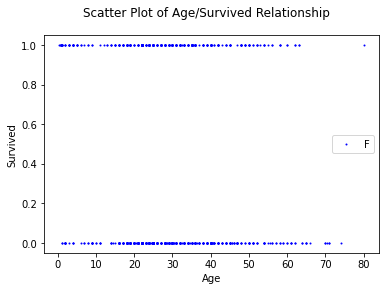

In [40]:
plt.scatter(x="Age", y="Survived", data = df, c="blue",s=1, alpha=1,label="F") #We have to pass the columns and the souce of the data
# plt.scatter(x="SibSp", y="Survived", data= df, c="pink",s=0.5, alpha=0.5, label="M")
plt.suptitle("Scatter Plot of Age/Survived Relationship")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend(loc="best")
plt.show()

In [ ]:
# https://stackoverflow.com/questions/43061768/plotting-multiple-scatter-plots-pandas

In [34]:
# Confusion Matrices
cnf_matrix = confusion_matrix(y_test, y_preg)

cnf_matrix

array([[127,  10],
       [ 28,  58]], dtype=int64)

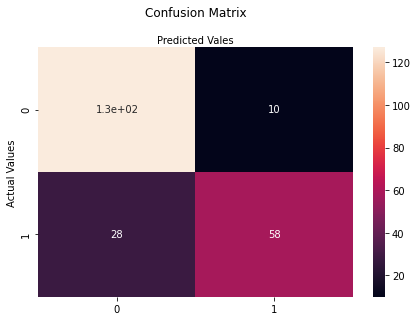

In [35]:
import seaborn as sns

class_names = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True) #cmap means yellow, fmt means gradient: cmap="YlGNBl", fmt = "g"
ax.xaxis.set_label_position("top")
plt.tight_layout() #so there is not spacing
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Vales")
plt.show()

In [36]:
print(classification_report(y_test, y_preg))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       137
           1       0.85      0.67      0.75        86

    accuracy                           0.83       223
   macro avg       0.84      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



In [37]:
from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Accuracy: {accuracy_score(y_test, y_preg) * 100}")
print(f"Precision: {precision_score(y_test, y_preg) * 100}")
print(f"Recall: {recall_score(y_test, y_preg) * 100}")

Accuracy: 82.95964125560538
Precision: 85.29411764705883
Recall: 67.44186046511628
